In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data=np.load('fashion_train.npy')


Shape before PCA:  (10000, 784)
Shape after PCA:  (10000, 2)
PCA Explained variance: [177.56002953 107.21140563]


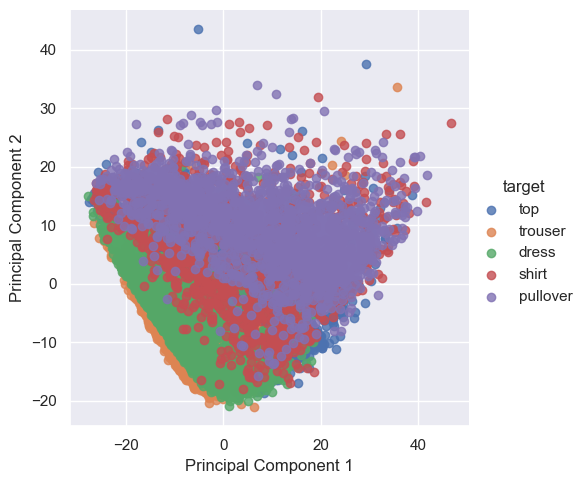

In [3]:
import seaborn as sns
sns.set()

X=np.delete(data, -1,axis=1)
y=data[:,-1]
#Scaling the data
x_scaled = StandardScaler().fit_transform(X)
 
# Dimention Reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)
  
# Show PCA characteristics
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
print('PCA Explained variance:', pca.explained_variance_)
 
# Create PCA DataFrame 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=[
        'Principal Component 1', 
        'Principal Component 2'
        ])

target_names = {
    0:'top',
    1:'trouser', 
    2:'pullover',
    3:'dress',
    4:'shirt'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
pca_df.sample(10)

sns.lmplot(
    x='Principal Component 1', 
    y='Principal Component 2', 
    data=pca_df, 
    fit_reg=False,
    hue='target',
    legend=True
    )
 

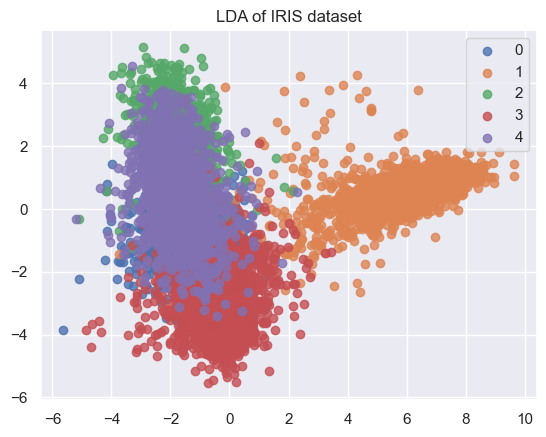

In [6]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

plt.figure()
for  i, target_name in zip([0, 1, 2,3,4], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()